DISEASE PREDICTION 


Training an algorithm to predict whether a patient has a disease based on their symptoms is immensely beneficial in modern healthcare. This approach enables early detection of potential health issues, allowing for prompt medical intervention and personalized treatment plans. By leveraging machine learning and predictive analytics, healthcare professionals can identify patterns and risk factors, providing more accurate diagnoses and improving overall patient outcomes. The timely recognition of symptoms can significantly enhance the efficiency of healthcare systems, optimize resource allocation, and reduce the economic burden associated with prolonged or advanced-stage treatments. Additionally, predictive algorithms empower individuals by offering insights into their health risks, fostering proactive healthcare management and promoting a preventive approach to well-being.


IMPORTING DEPENDENCIES

In [1]:

# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics





c:\Users\lesli\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


DATA COLLECTION AND PROCESSING

In [2]:
# loading csv data to a Pandas Dataframe
disease_data = pd.read_csv('resources/dataset.csv')



In [3]:
# print first five rows of the dataset
disease_data.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Print the last five rows of the dataset
disease_data.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# view shuffled dataset
disease_data= shuffle(disease_data,random_state=42)
disease_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# number of rows and columns in the dataset
disease_data.shape


(4920, 18)

In [7]:
# get some info about the data
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 373 to 860
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 730.3+ KB


In [8]:
# Removing Hyphen from strings
for col in disease_data.columns:
    
    disease_data[col] = disease_data[col].str.replace('_',' ')
disease_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Dataset characteristics
disease_data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [10]:
# Check for null and NaN values
null_checker = disease_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


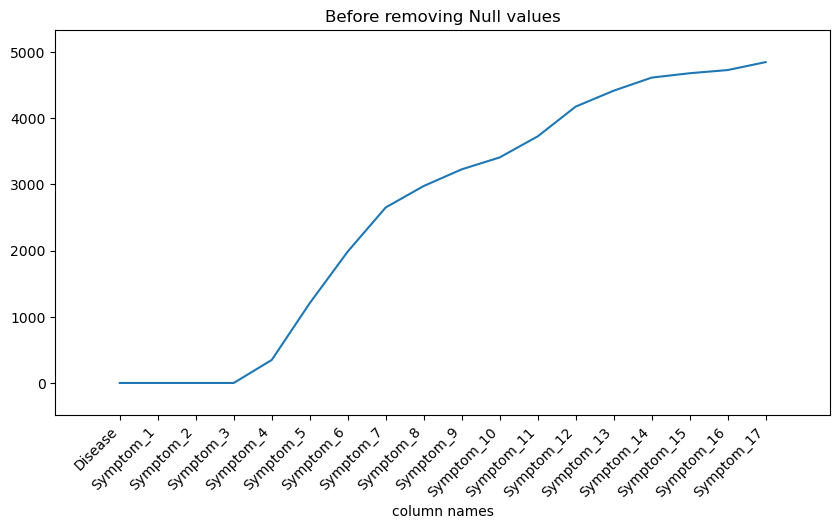

In [11]:

plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [12]:
# Remove the trailing space from the symptom columns
cols = disease_data.columns
data = disease_data[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(disease_data.shape)

disease_data = pd.DataFrame(s, columns=disease_data.columns)
disease_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Fill the NaN values with zero
disease_data = disease_data.fillna(0)
disease_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [14]:
#Save cleaned dataset as csv
disease_data.to_csv('resources/disease_data.csv')

In [15]:
# Symptom severity rank
symptom_severity = pd.read_csv('resources/Symptom-severity.csv')
symptom_severity['Symptom'] = symptom_severity['Symptom'].str.replace('_',' ')
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [16]:
# Get overall ist of symptoms
symptom_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [17]:
# ENCODE SYMPTOMS IN THE DATA WITH THE SYMPTOM RANK
vals = disease_data.values
symptoms = symptom_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = symptom_severity[symptom_severity['Symptom'] == symptoms[i]]['weight'].values[0]
    
symptom_severity_cleaning= pd.DataFrame(vals, columns=cols)
symptom_severity_cleaning.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [18]:
# Assign symptoms with no rank to zero
symptom_severity_cleaning= symptom_severity_cleaning.replace('dischromic  patches', 0)
symptom_severity_cleaning = symptom_severity_cleaning.replace('spotting  urination',0)
disease_data = symptom_severity_cleaning.replace('foul smell of urine',0)
disease_data.head(10)


C:\Users\lesli\AppData\Local\Temp\ipykernel_18080\1825456723.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  symptom_severity_cleaning= symptom_severity_cleaning.replace('dischromic  patches', 0)
C:\Users\lesli\AppData\Local\Temp\ipykernel_18080\1825456723.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  symptom_severity_cleaning = symptom_severity_cleaning.replace('spotting  urination',0)
C:\Users\lesli\AppData\Local\Temp\ipykernel_18080\1825456723.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and wi

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [19]:
# Check if entire columns have zero values so we can drop those values
null_checker = disease_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


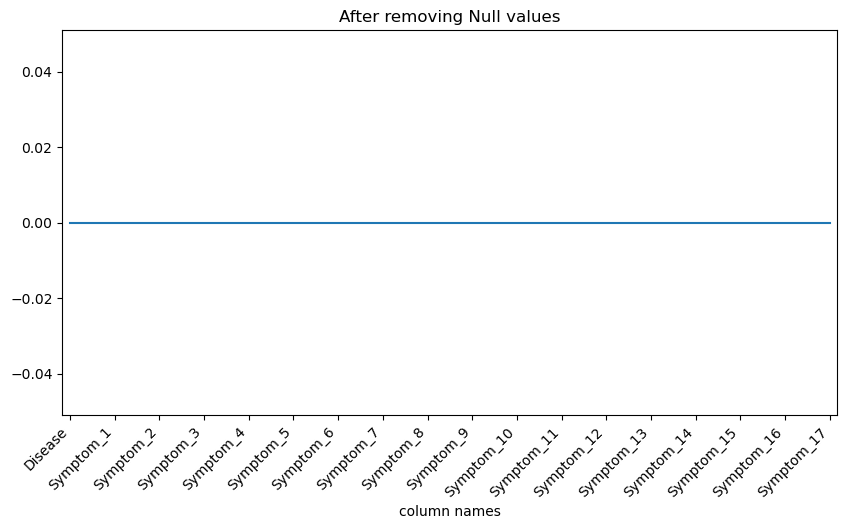

In [20]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [21]:
print("Number of symptoms used to identify the disease ",len(symptom_severity['Symptom'].unique()))
print("Number of diseases that can be identified ",len(disease_data['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [22]:
# Get the names of diseases from data
disease_data['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [23]:
# Save cleaned dataset as csv
symptom_severity.to_csv('resources/symptom_severity.csv')
symptom_severity.columns

Index(['Symptom', 'weight'], dtype='object')

In a machine learning context, features are the input variables used to make predictions, and the label (or target) is the variable you're trying to predict. Here's how you can determine which is your label and which are your features:

Features (Inputs):

Features are the variables or columns that contain the input data for your model.
Features are used to make predictions or classifications.
In a dataset, features are usually represented by columns, and each row represents an observation or data point.
Label (Output):

The label is the variable you are trying to predict or classify.
It is the target variable that your machine learning model will learn to predict based on the input features.
In a dataset, the label is often represented by a single column.

In [24]:
#Select the features as symptoms column and label as Disease column
data = disease_data.iloc[:,1:].values
labels = disease_data['Disease'].values

Splitting the dataset into training and testing sets serves several important purposes in machine learning:

Model Evaluation: The primary purpose is to evaluate how well the trained model generalizes to unseen data. By reserving a portion of the data for testing, you can assess the model's performance on new, previously unseen examples. This helps you understand how well the model is likely to perform in real-world scenarios.

Preventing Overfitting: Overfitting occurs when a model learns the training data too well, capturing noise and patterns that are specific to that dataset but do not generalize to new data. By using a separate testing set, you can detect whether your model is overfitting. If the model performs well on the training set but poorly on the testing set, it might be overfit.

Hyperparameter Tuning: During the model development process, practitioners often tweak hyperparameters (settings not learned from the data) to optimize performance. The testing set helps assess how well the model generalizes for different hyperparameter configurations, guiding the search for the best settings.

Avoiding Data Leakage: Data leakage occurs when information from the testing set unintentionally influences the training process. Keeping a distinct testing set prevents the model from learning anything about the testing data during training, ensuring a fair evaluation.

Statistical Validity: When you split your data into training and testing sets, it helps provide statistically valid estimates of the model's performance. This separation allows you to make more reliable inferences about how well the model will perform on new, unseen data.

The commonly used split ratio is 80% for training and 20% for testing, but variations like 70-30 or 75-25 are also common. The key is to strike a balance, ensuring a sufficiently large training set for the model to learn while reserving enough data for robust evaluation.







In [25]:
#Splitting the dataset to training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


Decision Tree

The Decision Tree algorithm works by recursively splitting the dataset into subsets based on the most significant attribute at each step. These splits create a tree-like structure, where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents the final prediction or classification.

Decision Trees are popular due to their simplicity, interpretability, and the ability to handle both numerical and categorical data. However, they can be prone to overfitting, and techniques like pruning are often employed to mitigate this issue. Random Forests, which consist of multiple Decision Trees, are a common ensemble method used to improve predictive performance.

The confusion matrix is a table that is often used to evaluate the performance of a classification algorithm. It shows the number of true positive, true negative, false positive, and false negative predictions made by the model on a set of data.

Here's a breakdown of the terminology used in a confusion matrix:

True Positive (TP): The model correctly predicted positive instances.
True Negative (TN): The model correctly predicted negative instances.
False Positive (FP): The model incorrectly predicted positive instances (Type I error).
False Negative (FN): The model incorrectly predicted negative instances (Type II error).
The confusion matrix is useful for assessing the performance of a classification model by providing insights into the types of errors it is making.

A heatmap is a graphical representation of data in which values are depicted as colors. When applied to a confusion matrix, a heatmap visually represents the distribution of correct and incorrect predictions. Typically, a darker color (e.g., a shade of red) may be used to represent higher values, while a lighter color (e.g., a shade of green) may be used to represent lower values.

Here's how you can read a confusion matrix heatmap:

True Positives (TP): Look for darker squares in the diagonal from the top-left to bottom-right. These represent correct positive predictions.

True Negatives (TN): Similar to TP, look for darker squares in the diagonal from the top-right to bottom-left. These represent correct negative predictions.

False Positives (FP): Look for lighter squares in the column where the true label is negative but the model predicted positive.

False Negatives (FN): Look for lighter squares in the row where the true label is positive but the model predicted negative.

By visually inspecting the heatmap, you can get a sense of which types of errors your model is making and where it might need improvement. Additionally, metrics derived from the confusion matrix, such as precision, recall, and F1 score, provide more specific insights into the model's performance.

F1-score% = 95.7812664665753 | Accuracy% = 95.83333333333334


<Axes: >

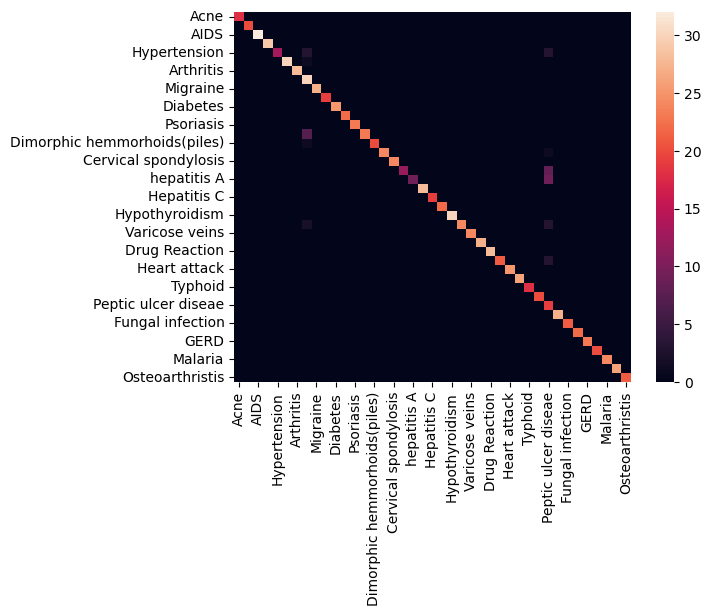

In [26]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=disease_data['Disease'].unique(), columns=disease_data['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)


In machine learning, mean accuracy and standard deviation are metrics used to evaluate the performance and reliability of a model. Here's what each of these metrics represents:

Mean Accuracy:

The mean accuracy is a measure of the average performance of a model across different iterations or folds in techniques like cross-validation.
It represents the average proportion of correct predictions made by the model on the dataset.
For example, if your mean accuracy is 0.80 (80%), it means that, on average, the model correctly predicted the outcome for 80% of the instances in the dataset.

Standard Deviation:

Standard deviation is a measure of the amount of variation or dispersion of a set of values. In the context of machine learning, it provides information about the variability of model performance.
A low standard deviation indicates that the model's performance is consistent across different subsets of the data, while a high standard deviation suggests variability in performance.
For example, if the standard deviation is 0.02 (2%), it indicates that the model's accuracy tends to vary by approximately 2% around the mean accuracy.

Interpretation:

A high mean accuracy is generally desirable, as it indicates a good overall performance of the model.
A low standard deviation suggests that the model is robust and performs consistently across different subsets of the data.
Together, mean accuracy and standard deviation provide a more comprehensive understanding of the model's performance, especially in situations where the dataset or evaluation method can lead to variability.

In [27]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.706%, Standard Deviation: (1.99%)


In [28]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 94.198%, Standard Deviation: (3.57%)


In [29]:
# Prepare the report
report = {
    'Training Set Performance': {
        'Mean Accuracy': DS_train.mean() * 100.0,
        'Standard Deviation': DS_train.std() * 100.0
    },
    'Testing Set Performance': {
        'Mean Accuracy': DS_test.mean() * 100.0,
        'Standard Deviation': DS_test.std() * 100.0
    }
}

# Create a DataFrame from the report dictionary
report_df = pd.DataFrame(report)

# Print the generated report
print(report_df)

                    Training Set Performance  Testing Set Performance
Mean Accuracy                      95.706010                94.198103
Standard Deviation                  1.985232                 3.567384


In [30]:
# Fucntion to manually test the models
discrp = pd.read_csv("resources/symptom_Description.csv")
discrp.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [39]:
# Read symptom precaution
precaution = pd.read_csv("resources/symptom_precaution.csv")
precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


joblib is a library in Python that provides tools for efficiently handling the execution of computational tasks, particularly those that involve parallel processing, caching, and efficient memory management. It is widely used for tasks such as parallel computing, memoization, and data pipelining.

Parallel Computing:

joblib allows you to parallelize the execution of functions using parallel processing. This can significantly speed up computations, especially for tasks that can be divided into independent subtasks.
Memoization:

Memoization is a technique where the results of expensive function calls are cached, so that when the same inputs occur again, the results can be quickly retrieved instead of recalculating them.
joblib provides a caching mechanism that can be used for memoization, helping to store and retrieve function outputs efficiently.
Efficiently Handling Large NumPy Arrays:

joblib is particularly well-suited for working with large NumPy arrays. It allows for efficient memory mapping, which can be beneficial when dealing with large datasets that may not fit entirely into memory.
Task Parallelism:

The library supports the parallel execution of tasks, making it useful for scenarios where multiple tasks can be performed simultaneously.
Serialization and Deserialization:

joblib provides tools for serializing and deserializing Python objects. This is useful for saving the state of an object to disk and reloading it later.
Support for Python Functions and Classes:

joblib can parallelize the execution of functions and methods, making it versatile for a variety of use cases.

In [34]:
# save
import joblib
joblib.dump(tree, "resources/Decision_tree.joblib")

['resources/Decision_tree.joblib']

In [35]:
# load, no need to initialize the loaded_tree
loaded_tree = joblib.load("resources/Decision_tree.joblib")

This code defines a function named predd that takes as input a set of symptoms (S1 to S17) and makes predictions about a disease based on a pre-trained machine learning model (x). Here's a step-by-step explanation of the code:


Input Parameters:
The function takes 17 symptoms (S1 to S17) as input parameters.

Symptom Mapping:
The function creates a list (psymptoms) containing the severity weights of the input symptoms. It does this by mapping each symptom to its corresponding weight from the symptom_severity dataframe.

Prediction:
The function uses the pre-trained machine learning model (x) to make a prediction based on the input symptoms. The predicted disease is stored in the variable pred2.

Disease Information Retrieval:
The code then retrieves information about the predicted disease from a dataframe named discrp. It extracts the disease description associated with the predicted disease.

Precaution Retrieval:
It retrieves recommended precautions for the predicted disease from a dataframe named precaution. The code identifies the row corresponding to the predicted disease and extracts the precautions.

Output Display:
The code prints the predicted disease name, its description, and the recommended precautions to take at home.

Here's a breakdown of the output:
Disease Name: The name of the disease predicted by the model.
Disease Description: A description of the predicted disease.
Recommended Things to do at home: A list of recommended precautions for managing the predicted disease at home.

In [36]:
def predd(x,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    #print(psymptoms)
    a = np.array(symptom_severity["Symptom"])
    b = np.array(symptom_severity["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= discrp[discrp['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = precaution[precaution['Disease']==pred2[0]]
    c=np.where(precaution['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(precaution.iloc[c])):
          precuation_list.append(precaution.iloc[c,i])
    print("The Disease Name: ",pred2[0])
    print("The Disease Discription: ",disp)
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)

In [37]:
sympList=symptom_severity["Symptom"].to_list()
predd(tree,sympList[7],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0)

The Disease Name:  Paralysis (brain hemorrhage)
The Disease Discription:  Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommended Things to do at home: 
massage
eat healthy
exercise
consult doctor
